In [3]:
!apt-get -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1  
!apt-get update  
!apt-get install --no-install-recommends nvidia-375  
!apt-get install --no-install-recommends nvidia-opencl-icd-375 nvidia-opencl-dev opencl-headers

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Hit:8 http://archive.ub

In [1]:
!git clone --single-branch https://github.com/minyoungg/selfconsistency

fatal: destination path 'selfconsistency' already exists and is not an empty directory.


In [0]:
import os
os.chdir('selfconsistency')

In [5]:
!pwd

/content/selfconsistency


In [6]:
!bash pip install -r requirements.txt

In [0]:
from __future__ import print_function

import time
import init_paths
import skimage.io as skio
import matplotlib.pyplot as plt
import demo

In [22]:
from google.colab import files

uploaded = files.upload()

##files.upload returns a dictionary of the files which were uploaded. The 
##dictionary is keyed by the file name, the value is the data which was 
##uploaded.

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bears.jpg to bears.jpg
Saving eyes.jpg to eyes.jpg
Saving floppy.jpg to floppy.jpg
Saving gangnam.jpg to gangnam.jpg
Saving jesus.jpg to jesus.jpg
Saving monkey.jpg to monkey.jpg
Saving moon.jpg to moon.jpg
Saving news1.jpg to news1.jpg
Saving news2.jpg to news2.jpg
Saving news3.jpg to news3.jpg
Saving passport.jpg to passport.jpg
Saving pilot.jpg to pilot.jpg
Saving sheep.jpg to sheep.jpg
User uploaded file "moon.jpg" with length 39692 bytes
User uploaded file "floppy.jpg" with length 50712 bytes
User uploaded file "pilot.jpg" with length 5219161 bytes
User uploaded file "bears.jpg" with length 81540 bytes
User uploaded file "monkey.jpg" with length 67434 bytes
User uploaded file "gangnam.jpg" with length 52461 bytes
User uploaded file "news2.jpg" with length 1102415 bytes
User uploaded file "news1.jpg" with length 104137 bytes
User uploaded file "eyes.jpg" with length 641512 bytes
User uploaded file "news3.jpg" with length 77645 bytes
User uploaded file "jesus.jpg" with length

## Initialize Demo Solver

In [9]:
! chmod 755 download_model.sh && ./download_model.sh

Saving to ./ckpt/exif_final.zip
for details.

--2018-12-25 17:11:27--  http://people.eecs.berkeley.edu/~owens/consistency/exif_final.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 285403651 (272M) [application/zip]
Saving to: ‘exif_final.zip’

exif_final.zip      100%[===================>] 272.18M  5.83MB/s    in 82s     

2018-12-25 17:12:48 (3.33 MB/s) - ‘exif_final.zip’ saved [285403651/285403651]

Archive:  exif_final.zip
   creating: ./ckpt/exif_final/
  inflating: ./ckpt/exif_final/exif_final.ckpt.meta  
  inflating: ./ckpt/exif_final/exif_final.ckpt.index  
  inflating: ./ckpt/exif_final/exif_final.ckpt.data-00000-of-00001  


In [10]:
# Arg: quality and num_per_dim -> tradeoffs between quality and time spent running 
# quality affects dense=False, and num_per_dim affects dense=True
ckpt_path = './ckpt/exif_final/exif_final.ckpt'
exif_demo = demo.Demo(ckpt_path=ckpt_path, use_gpu=0, quality=3.0, num_per_dim=30)

Initializing graph on gpu 0
INFO:tensorflow:Restoring parameters from ./ckpt/exif_final/exif_final.ckpt
unknown checkpoint string format ./ckpt/exif_final/exif_final.ckpt setting iteration to 0
Succesfully resuming from ./ckpt/exif_final/exif_final.ckpt
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


## Run examples
This takes some time be patient :) 

In [27]:
for fn in uploaded.keys():
  print('./{}'.format(fn))

./moon.jpg
./floppy.jpg
./pilot.jpg
./bears.jpg
./monkey.jpg
./gangnam.jpg
./news2.jpg
./news1.jpg
./eyes.jpg
./news3.jpg
./jesus.jpg
./sheep.jpg
./passport.jpg


./moon.jpg
MeanShift run time: 328.612
DBSCAN run time: 41.960


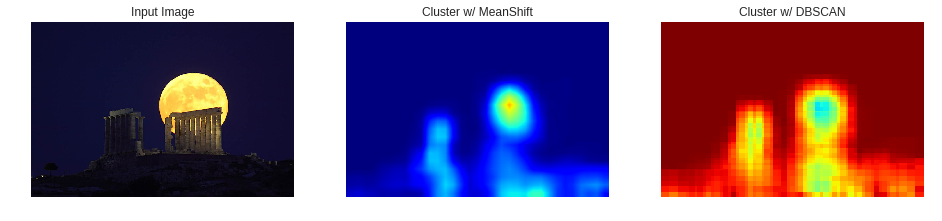

./floppy.jpg
MeanShift run time: 563.915
DBSCAN run time: 6.323


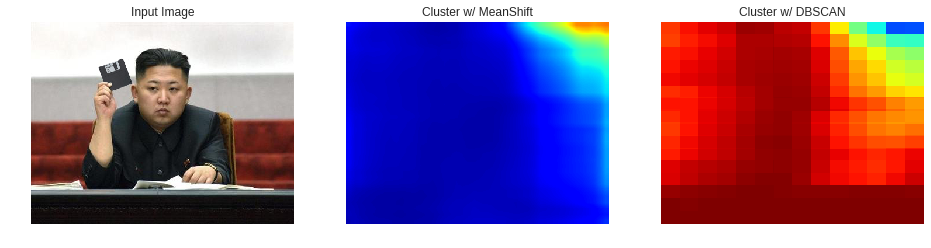

./pilot.jpg
MeanShift run time: 467.323
DBSCAN run time: 739.705


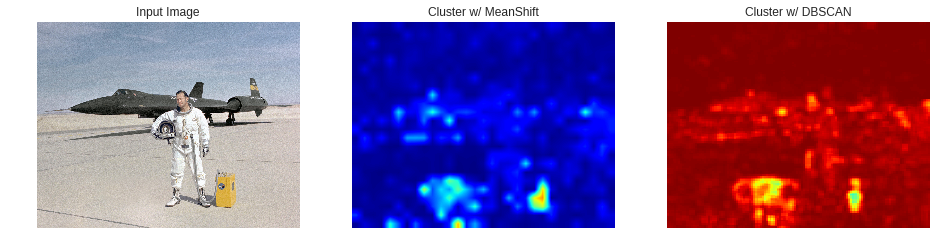

./bears.jpg
MeanShift run time: 782.749
DBSCAN run time: 12.542


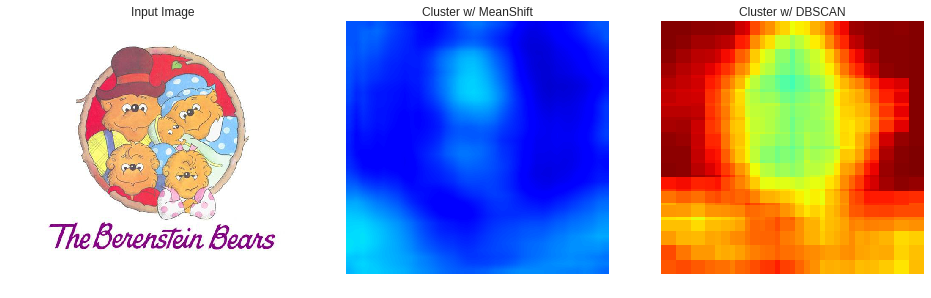

./monkey.jpg
MeanShift run time: 666.207
DBSCAN run time: 12.050


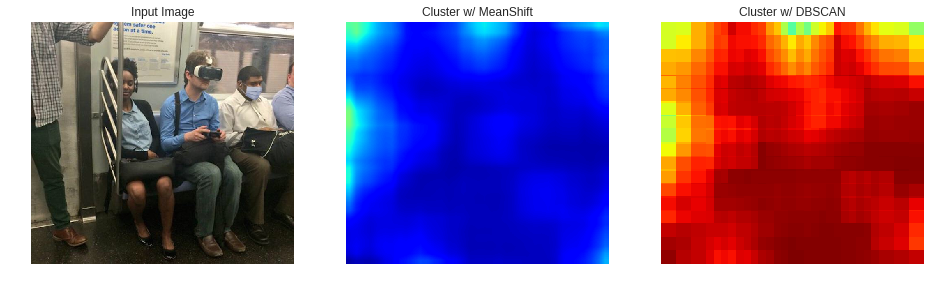

./gangnam.jpg
MeanShift run time: 522.414
DBSCAN run time: 9.040


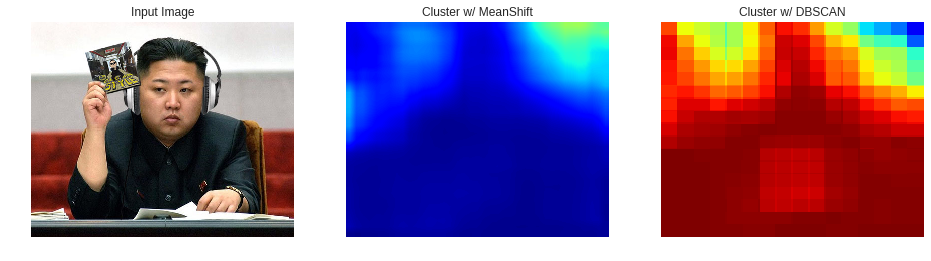

./news2.jpg
MeanShift run time: 324.927
DBSCAN run time: 174.147


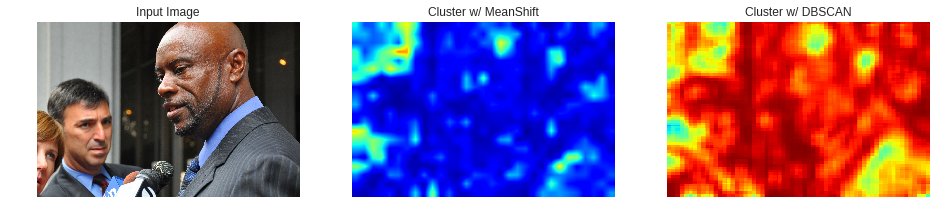

./news1.jpg
MeanShift run time: 304.202
DBSCAN run time: 11.786


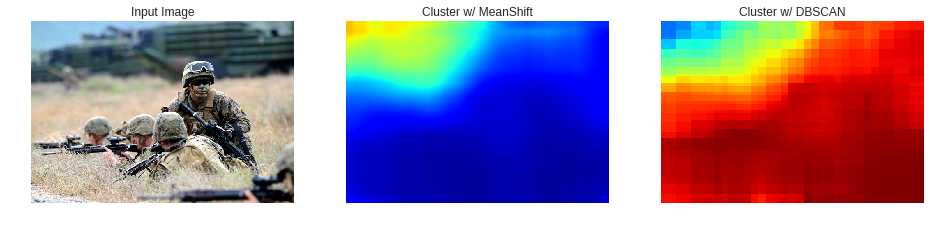

./eyes.jpg
MeanShift run time: 386.830
DBSCAN run time: 43.221


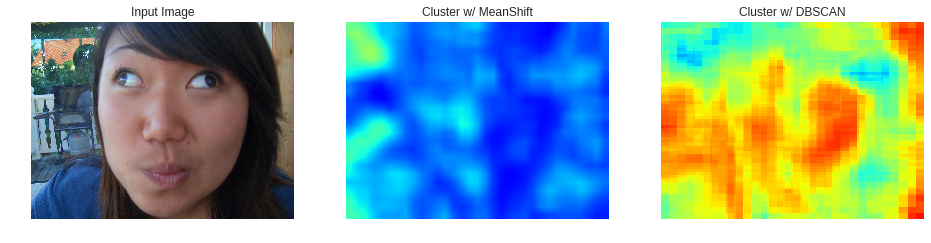

./news3.jpg
MeanShift run time: 379.070
DBSCAN run time: 11.263


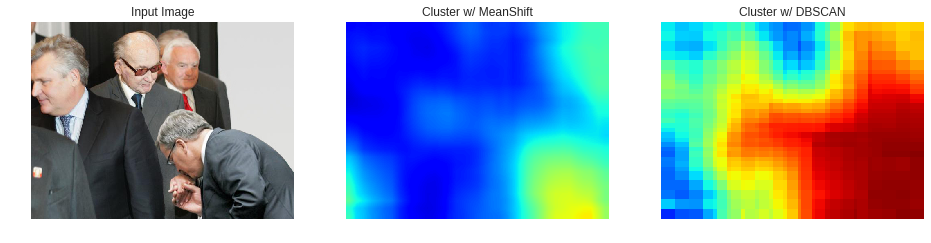

./jesus.jpg
MeanShift run time: 899.130
DBSCAN run time: 12.239


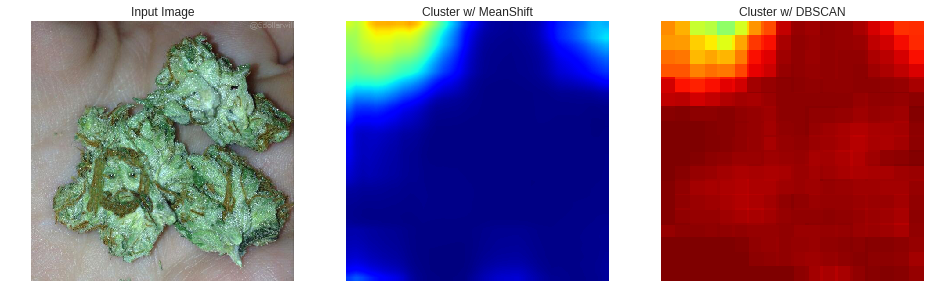

./sheep.jpg
MeanShift run time: 314.255
DBSCAN run time: 8.988


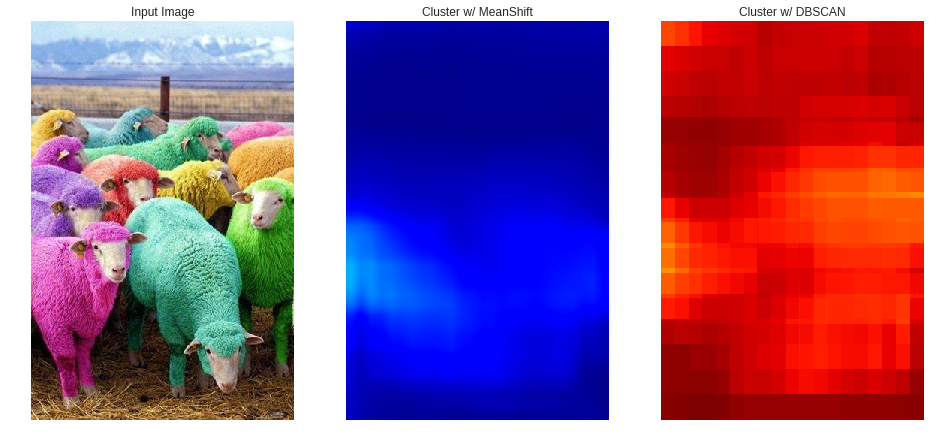

./passport.jpg
MeanShift run time: 437.450
DBSCAN run time: 24.086


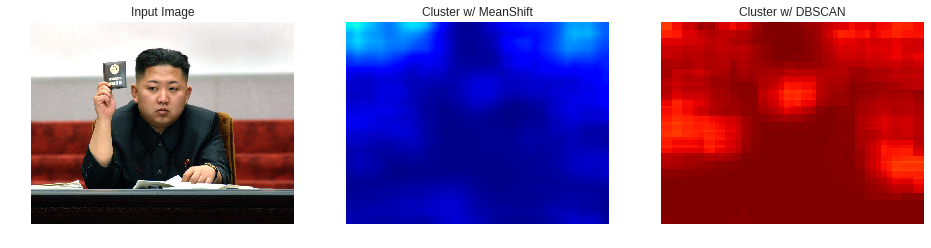

In [28]:
for fn in uploaded.keys():
  img_path = './{}'.format(fn)
  print(img_path)

  # MeanShift + dense affinities (as described in our paper)
  ms_st = time.time()
  im1, res1 = exif_demo(img_path, dense=True) # Upsampled via bilinear upsampling
  print('MeanShift run time: %.3f' % (time.time() - ms_st))

  # DBSCAN + sparse anchors
  db_st = time.time()
  im2, res2 = exif_demo(img_path, dense=False) # No upsampling
  print('DBSCAN run time: %.3f' % (time.time() - db_st))
  
  % matplotlib inline
  plt.subplots(figsize=(16, 8))
  plt.subplot(1, 3, 1)
  plt.title('Input Image')
  plt.imshow(im1)
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.title('Cluster w/ MeanShift')
  plt.axis('off')
  plt.imshow(1.0 - res1, cmap='jet', vmin=0.0, vmax=1.0)

  plt.subplot(1, 3, 3)
  plt.title('Cluster w/ DBSCAN')
  plt.axis('off')
  plt.imshow(res2, cmap='jet', vmin=0.0, vmax=1.0)

  plt.show()

## Normalized Cuts
While running the dense version, the algorithm produces a dense affinity which can be used in popular spectral clustering methods. The following code runs both the clustering with MeanShift and segmentation with N-Cuts.

In [0]:
res = exif_demo.run(im1, use_ncuts=True, blue_high=True)

% matplotlib inline
plt.subplots(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(im1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Cluster w/ MeanShift')
plt.axis('off')
plt.imshow(res[0], cmap='jet', vmin=0.0, vmax=1.0)

plt.subplot(1, 3, 3)
plt.title('Segment with NCuts')
plt.axis('off')
plt.imshow(res[1], vmin=0.0, vmax=1.0)

plt.show()